# Vježbe 5 - dio 1
 - Analiza domaće zadaće

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.datasets import make_blobs

plt.rcParams["figure.figsize"] = (7, 7)

---
## Zadatak 1 (10 bodova)
Pokažite da su kriterijske funkcije
$$
J_1(\Theta)=\frac{1}{m}\sum\limits_{i=1}^{m}\log(1+\exp{(-y^{(i)}\Theta^Tx^{(i)})}), \textrm{ gdje je } y^{(i)}\in\{-1,1\}
$$ 
i 
$$
J_2(\Theta) = \frac{1}{m}\sum\limits_{i=1}^{m}\left[-y^{(i)}\log{(h_{\Theta}(x^{(i)}))}-(1-y^{(i)})\log{(1-h_{\Theta}(x^{(i)}))}\right], \textrm{ gdje je } y^{(i)}\in \{0,1\}
$$
ekvivalentne. Model funkcija $h_{\Theta}$ je definirana s
$$
h_{\Theta}(x) = \sigma(\Theta^Tx).
$$
Možete izostaviti bias parametar $\theta_0$.

---
Ovdje napišite svoj odgovor.

---
## Zadatak 2 (10 bodova)
Na predavanju je predstavljena softmax regresija i dana je kriterijska funkcija 
$$
J(\Theta) = - \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{k} I^{j}(y^{(i)})\log{\frac{\exp{(\Theta^{(j)^T}x^{(i)}})}{\sum\limits_{l=1}^{k}\exp{(\Theta^{(l)^{T}}x^{(i)}})}}
$$
Izračunajte gradijent funkcije $J$.  Možete izostaviti bias parametar $\theta_0$.

---
Ovdje napišite svoj odgovor.

---
## Zadatak 3 (15 bodova)
Zadani su podaci $X\in \mathbb{R}^{m\times n}$ i pripadne oznake $y \in \mathbb{R}^{m}$ koje označavaju pripadnost klasi $0$ ili $1$. Vaš zadatak je implementirati model binarne logističke regresije.

Logistička regresija kao model funkciju koristi $h_{\Theta, \theta_0}(x) = \sigma(\Theta^Tx + \theta_0)$, gdje su $\Theta$ i $\theta_0$ parametri koje je potrebno naučiti.

Učenje se svodi na minimizaciju konveksne funkcije $J(\Theta, \theta_0) = \frac{1}{m}\sum\limits_{i=1}^m\left[-y^{(i)}\log{(h_{\Theta, \theta_0}(x^{(i)}))} - (1-y^{(i)})\log{(1-h_{\Theta, \theta_0}(x^{(i)}))}\right]$, što se može izračunati primjenom gradijentne metode.

Vaši zadaci su sljedeći:
 1. Implementirajte gradijentnu metodu za slučaj binarne klasifikacije. Funkcija koja pokreće gradijentnu metodu kao argumente treba primati podatke $X$, oznake $y$, stopu učenja $\alpha$ i broj iteracija metode.
 2. Učitajte podatke iz datoteke `heart.csv`. U datoteci se nalaze podaci o pacijentima vezani uz zdravlje njihovog krvožilnog sustava, te je svakom pacijentu pridružena oznaka $0$ ako ne boluje od srčanih bolesti i $1$ ako boluje.
 3. Istražite, vizualizirajte i pripremite podatke za učenje modela. Kao izlaz uzmite varijablu `target`, a kao ulaz neki podskup ostalih varijabli. Razdvojite podatke tako da skup za treniranje sadrži $80\%$ podataka, a skup za testiranje ostatak.
 4. Natrenirajte klasifikacijski model primjenom implementirane gradijentne metode.
 5. Iskoristite neke od metrika definiranih na vježbama kako biste evaluirali model (na testnom skupu) i ispišite pripadnu matricu zabune.
 6. Usporedite dobiveni rezultat s [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) iz scikit-learn biblioteke.

### Podzadatak 1

In [2]:
class LogReg:
    def __init__(self):
        self.theta = None
        self.loss = None

    def sigmoid(self, X):
        """
        Racuna vrijednost sigmoid funkcije
        """
        return 1 / (1 + np.exp(-X))

    def h(self, X):
        """
        Racuna vrijednost model funkcije za 
        X.shape = (m, n)
        """
        return self.sigmoid(self.theta[0] + np.dot(X, self.theta[1:]))

    def J(self, X, y):
        """
        Racuna vrijednost funkcije J za
        X.shape = (m, n)
        y.shape = (m, 1)
        """
        m = X.shape[0]
        output = self.h(X)
        return -(1.0 / m) * np.sum(y * np.log(output) + (1 - y) * np.log(1 - output))

    def predict(self, X):
        pred = self.h(X)
        return np.array([1 if p >= 0.5 else 0 for p in pred])

    def gradient(self, X, y):
        """
        Racuna gradijent funkcije J za
        X.shape = (m, n)
        y.shape = (m, 1)
        theta.shape = (n+1, 1)
        """
        m = X.shape[0]
        X_t = np.concatenate((np.ones((m, 1)), X), axis=1).T
        return (1.0 / m) * (X_t @ (self.h(X) - y))

    def fit(self, X, y, lr=0.01, num_iter=200, verbose=True):
        """
        X je dimenzije m x n
        """
        if verbose:
            print(f'Starting gradient descent with {num_iter} iterations and learning rate {lr}')
        log_interval = num_iter // 5
        m, n = X.shape
        self.theta = np.zeros((n + 1, 1))
        self.loss = np.empty(num_iter)
        for it in range(num_iter):
            self.loss[it] = self.J(X, y)
            grad = self.gradient(X, y)
            self.theta = np.subtract(self.theta, lr * grad)
            if verbose and it % log_interval == (log_interval - 1):
                print(f'Iteration {it + 1}')
                print(f'grad = {grad.squeeze()}')
                print(f'theta = {self.theta.squeeze()}')
        if verbose:
            print(f'Finished gradient descent with {num_iter} iterations and learning rate {lr}')

    def plot_contour(X, y, model):
        assert X.shape[0] == 2
        plt.scatter(X[:, 0], X[:, 1], c=y)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 1000),
                             np.linspace(ylim[0], ylim[1], 1000))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, cmap='spring', alpha=0.2)
        plt.show()

### Podzadatak 2 i 3

In [3]:
with open('./Podaci/heart.csv') as f:
    df_heart = pd.read_csv(f)
    data = pd.DataFrame.to_numpy(df_heart)
    y = data[:, -1].reshape(-1, 1) # zadnji stupac
    X = data[:, :-1] # svi stupci osim zadnjeg
    
print(df_heart)

      Age  Sex  Chest_Pain  Resting_Blood_Pressure  Colestrol  \
0    63.0  1.0         1.0                   145.0      233.0   
1    67.0  1.0         4.0                   160.0      286.0   
2    67.0  1.0         4.0                   120.0      229.0   
3    37.0  1.0         3.0                   130.0      250.0   
4    41.0  0.0         2.0                   130.0      204.0   
..    ...  ...         ...                     ...        ...   
292  57.0  0.0         4.0                   140.0      241.0   
293  45.0  1.0         1.0                   110.0      264.0   
294  68.0  1.0         4.0                   144.0      193.0   
295  57.0  1.0         4.0                   130.0      131.0   
296  57.0  0.0         2.0                   130.0      236.0   

     Fasting_Blood_Sugar  Rest_ECG  MAX_Heart_Rate  Exercised_Induced_Angina  \
0                    1.0       2.0           150.0                       0.0   
1                    0.0       2.0           108.0         

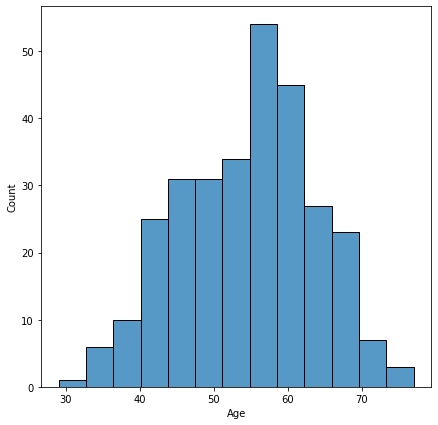

In [4]:
sns.histplot(data=df_heart, x='Age')
plt.show()

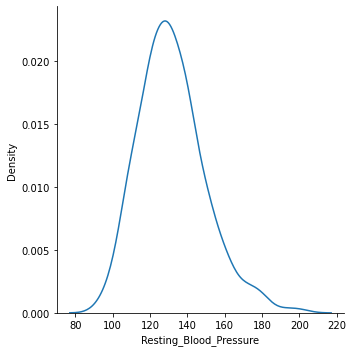

In [5]:
sns.displot(data=df_heart, x='Resting_Blood_Pressure', kind='kde')
plt.show()

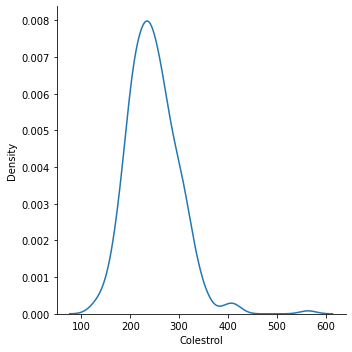

In [6]:
sns.displot(data=df_heart, x='Colestrol', kind='kde')
plt.show()

Kratkim pregledom uočavamo da varijable krvnog tlaka i kolesterola nisu normalno distribuirane. Moguće je to i potvrditi primjenom statističkih testova, na primjer [Shapiro-Wilk testa](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.shapiro.html).

Utječe li to na testiranje? Treba nam dodatnog znanja iz statistike...

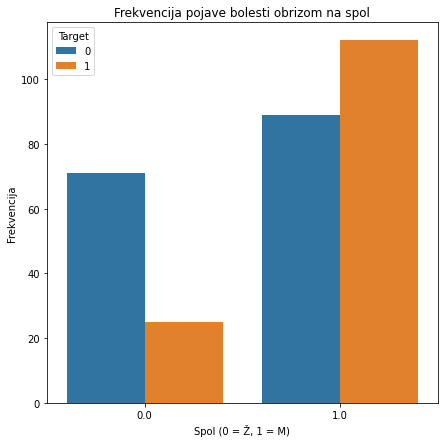

In [7]:
ax = sns.countplot(data=df_heart, x='Sex', hue='Target')
ax.set(xlabel='Spol (0 = Ž, 1 = M)',
       ylabel='Frekvencija',
       title='Frekvencija pojave bolesti obrizom na spol')

plt.show()

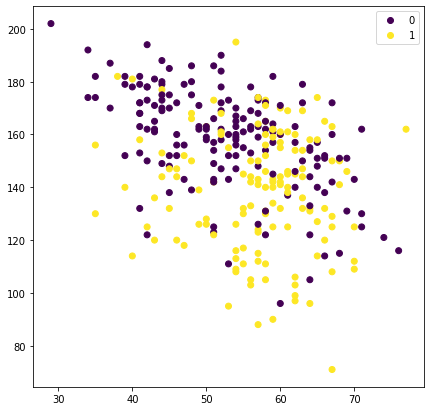

In [8]:
ax = plt.scatter(df_heart['Age'], df_heart['MAX_Heart_Rate'], c=df_heart['Target']) 
plt.legend(handles=ax.legend_elements()[0], labels=['0','1'])
plt.show()

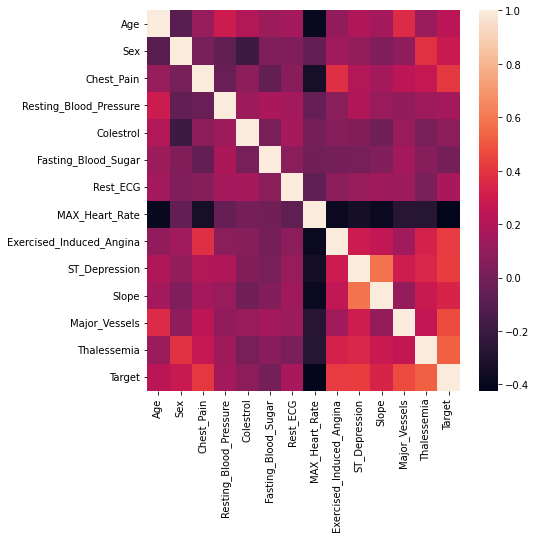

In [9]:
corr = df_heart.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model1 = LogReg()
model1.fit(X_train, y_train, num_iter=30000, lr=0.02, verbose=False)  

### Podzadatak 5

In [12]:
y_hat = model1.predict(X_test)
print(f'Accuracy  = {accuracy_score(y_test, y_hat)}')
print(f'Recall    = {recall_score(y_test, y_hat)}')
print(f'Precision = {precision_score(y_test, y_hat)}')

Accuracy  = 0.8333333333333334
Recall    = 0.8076923076923077
Precision = 0.8076923076923077


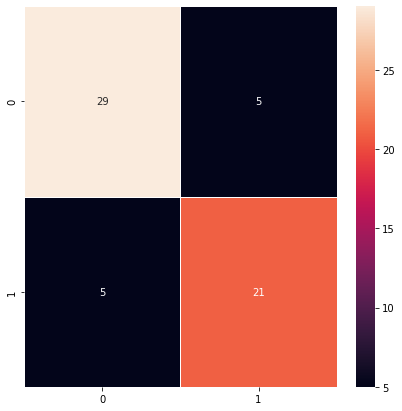

In [13]:
cf_matrix = confusion_matrix(y_test, y_hat)
sns.heatmap(cf_matrix, linewidths=1, annot=True)
plt.show()

### Podzadatak 6

In [14]:
model2 = LogisticRegression()
model2.fit(X_train, y_train.squeeze())  
y_hat = model2.predict(X_test)
print(f'Accuracy  = {accuracy_score(y_test, y_hat)}')
print(f'Recall    = {recall_score(y_test, y_hat)}')
print(f'Precision = {precision_score(y_test, y_hat)}')

Accuracy  = 0.8166666666666667
Recall    = 0.7692307692307693
Precision = 0.8


---
## Zadatak 4 (10 bodova)
Zadani su podaci $X\in \mathbb{R}^{m\times n}$ i pripadne oznake $y \in \mathbb{R}^{m}$ koje označavaju pripadnost jednoj od klasa $0, 1, \dots, k-1$. Vaš zadatak je implementirati model višeklasne logističke regresije.

OvO (One versus One) je strategija za višeklasnu klasifikaciju, gdje se odluka donosi na temelju $\frac{k(k-1)}{2}$ modela:
 - svakom od modela pridružujemo oznaku $\textrm{model}_{ij}$, gdje je $0 \leq i < j < k$
 - $\textrm{model}_{ij}$ radi binarnu klasifikaciju nad podacima iz klasa $i$ i $j$ te se trenira na podskupu skupa za treniranje s oznakama $i$ i $j$, tj. na skupu $S_{ij} = \{(x^{(l)}, y^{(l)}) : y^{(l)} = i \lor y^{(l)} = j\} \subseteq S$, gdje je $S$ skup za treniranje.
 - odluka o klasifikaciji točke se donosi donošenjem odluke za svaki od $\frac{k(k-1)}{2}$ modela te se odabire ona klasa $i$ čija frekvencija klasifikacije je najveća
 - drugim riječima, ako je $f_i$ broj modela koju su danu točku klasificirali klasom $i$, onda je izlaz OvO modela $\textrm{argmax}{}_{i=0,\dots,k-1}f_i$, što je klasa $i$ s najvećom pripadnom vrijednosti $f_i$
 
Vaš zadatak je sljedeći:
 1. Nadogradite algoritam logističke regresije tako da rješava problem višeklasne klasifikacije uz primjenu OvO strategije.
 2. Učitajte podatke `mobiteli.csv`. U datoteci se nalaze karakteristike i cjenovni rangovi mobitela. Neke varijable su kategoričke (npr. `dual_sim` poprima vrijednosti 0 ili 1) , dok su ostale numeričke (npr. `clock_speed`). Svaki mobitel je kategoriziran u cjenovni razred 0, 1, 2 ili 3.
 3. Istražite, vizualizirajte i pripremite podatke za učenje modela. Kao izlaz uzmite varijablu `price_range`, a kao ulaz neki podskup ostalih varijabli. Razdvojite podatke tako da skup za treniranje sadrži $80\%$ podataka, a skup za testiranje ostatak.
 4. Natrenirajte klasifikacijski model primjenom implementirane OvO strategije.
 5. Iskoristite neke od metrika definiranih na vježbama kako biste evaluirali model (na testnom skupu) i ispišite pripadnu matricu zabune.
 6. Usporedite dobiveni rezultat s [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) iz scikit-learn biblioteke.

### Podzadatak 1

In [15]:
class LogRegOvO:
    def __init__(self):
        self.models = None
        self.num_classes = None

    def predict(self, X):
        cnt = np.zeros((X.shape[0], self.num_classes))
        for i in range(self.num_classes):
            for j in range(i + 1, self.num_classes):
                pred = self.models[i][j].predict(X)
                for k, p in enumerate(pred):
                    if p >= 0.5:
                        cnt[k][j] += 1
                    else:
                        cnt[k][i] += 1  
        return np.argmax(cnt, axis=1)

    def fit(self, X, y, num_classes, lr=0.01, num_iter=200):
        """
        X je dimenzije m x n
        """
        print(f'Starting OvO training with {num_iter} iterations and learning rate {lr}')
        log_interval = num_iter // 5
        m, n = X.shape
        self.num_classes = num_classes
        self.models = [[LogReg() for j in range(num_classes)] for i in range(num_classes)]
        for i in range(num_classes):
            for j in range(i + 1, num_classes):
                indices = np.where((y == i) | (y == j))[0]
                X_subset = X[indices, :]
                y_subset = y[indices]
                y_subset[y_subset == i] = 0
                y_subset[y_subset == j] = 1
                self.models[i][j].fit(X_subset, y_subset, lr, num_iter, verbose=False)
        print(f'Finished OvO training with {num_iter} iterations and learning rate {lr}')

    def plot_contour(X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 1000),
                             np.linspace(ylim[0], ylim[1], 1000))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contour(xx, yy, Z, cmap='spring', alpha=0.2)
        plt.show()

### Podzadatak 2 i 3

In [16]:
with open('./Podaci/mobiteli.csv') as f:
    df_mobiteli = pd.read_csv(f)
    data = pd.DataFrame.to_numpy(df_mobiteli)
    y = data[:, -1].reshape(-1, 1) # zadnji stupac
    X = data[:, :-1] # svi stupci osim zadnjeg
    
print(df_mobiteli)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

<AxesSubplot:xlabel='n_cores', ylabel='Count'>

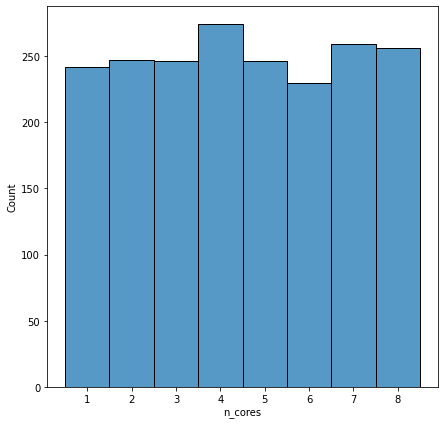

In [17]:
sns.histplot(data=df_mobiteli, x='n_cores', discrete=True)

<AxesSubplot:xlabel='price_range', ylabel='n_cores'>

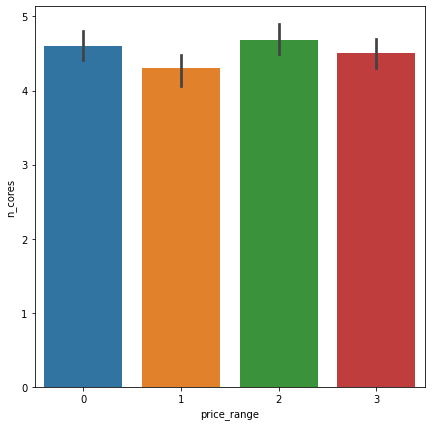

In [18]:
sns.barplot(data=df_mobiteli, x='price_range', y='n_cores')

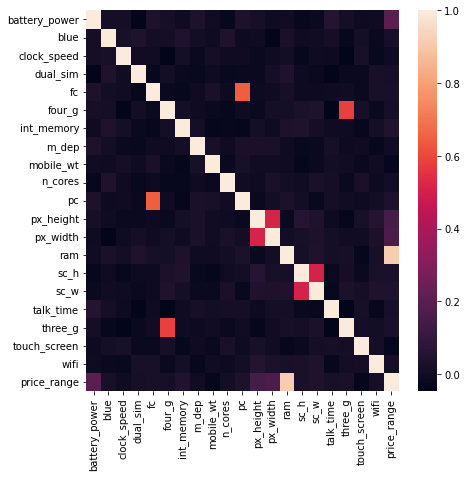

In [19]:
corr = df_mobiteli.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [20]:
X = df_mobiteli[['battery_power', 'px_height', 'px_width', 'ram']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Podzadatak 4 i 5

In [21]:
model4 = LogRegOvO()
model4.fit(X_train, y_train, num_classes=4, lr=0.02, num_iter=20000)  

Starting OvO training with 20000 iterations and learning rate 0.02
Finished OvO training with 20000 iterations and learning rate 0.02


In [22]:
y_hat = model4.predict(X_test)
print(f'Accuracy  = {accuracy_score(y_test, y_hat)}')
print(f'Recall    = {recall_score(y_test, y_hat, labels=[0,1,2,3], average="macro")}')
print(f'Precision = {precision_score(y_test, y_hat, labels=[0,1,2,3], average="macro")}')

Accuracy  = 0.94
Recall    = 0.9410598153352068
Precision = 0.9420657583421718


### Podzadatak 6

In [23]:
model5 = LogisticRegression(max_iter=1000).fit(X_train, y_train.squeeze())
y_hat = model5.predict(X_test)
print(f'Accuracy  = {accuracy_score(y_test, y_hat)}')
print(f'Recall    = {recall_score(y_test, y_hat, labels=[0,1,2,3], average="macro")}')
print(f'Precision = {precision_score(y_test, y_hat, labels=[0,1,2,3], average="macro")}')

Accuracy  = 0.95
Recall    = 0.9516800481734242
Precision = 0.9507211538461537


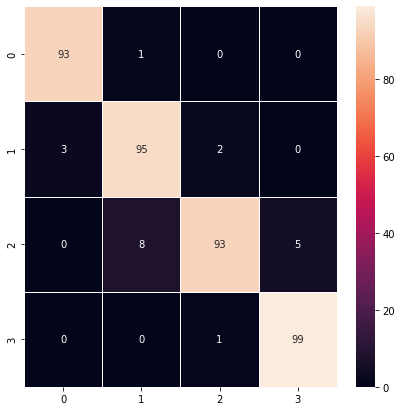

In [24]:
cf_matrix = confusion_matrix(y_test, y_hat)
sns.heatmap(cf_matrix, linewidths=1, annot=True)
plt.show()

---
## Zadatak 5 (15 bodova) 
U procesu učenja često se javlja problem optimalnog odabira **hiperparametara**:
 - stope učenja
 - regularizacijskih parametara (o njima nešto kasnije)
 - dimenzije prostora u koji preslikavamo ulazne podatke
 - stupnja polinoma model-funkcije u modelu polinomne regresije
 - i tako dalje...
 
Fokusirajmo se sada na određivanje optimalne stope učenja (duljine koraka).

Ako je stopa učenja prevelika, postoji mogućnost da model nikad ne konvergira, nego parametar modela uvijek "preskače" točku u kojoj se postiže minimum funkcije cilja.

S druge strane, ako je stopa učenja premala, konvergencija je spora te postoji mogućnost da model ne konvergira u razumnom broju koraka.

Pošto želimo odabrati "optimalne" hiperparametre kako bismo natrenirali model, potrebno je konstruirati nekakvu metodu kojom ih možemo odrediti.

Umjesto razdvajanja polaznog skupa podataka na skup za treniranje i testiranje, pravimo dodatni, **validacijski skup** kojim ćemo određivati optimalnu vrijednost hiperparametra.

Algoritam je sljedeći:
 - zadaj dostupni izbor hiperparametara $\{\alpha_1, \dots, \alpha_l\}$ (u ovom slučaju stope učenja)
 - razdvoji skup podataka na tri disjunktna skupa, za treniranje, validaciju i testiranje (u nekom proizvoljnom omjeru, npr. 80%:10%:10%)
 - za svaki od parametara $\alpha$ radi sljedeće
 - &nbsp;&nbsp;&nbsp;&nbsp; natreniraj model sa hiperparametrom $\alpha$ na skupu za treniranje
 - &nbsp;&nbsp;&nbsp;&nbsp; izračunaj prosječnu vrijednost funkcije gubitka na skupu za validaciju
 - odaberi onaj model koji je rezultirao najmanjim gubitkom na validacijskom skupu i evaluiraj ga na testnom skupu
 
Naravno, algoritam se može generalizirati na više skupova hiperparametara. Algoritam daje dobre odabire hiperparametra, ali je problematičan ukoliko polazni skup podataka nije dovoljno velik (npr. $m=20$). U tom slučaju ne želimo *izgubiti* podatke potrebne za treniranje modela pa definiramo novi algoritam **k-fold unakrsne validacije**:
 - zadaj dostupni izbor hiperparametara $\{\alpha_1, \dots, \alpha_l\}$ (u ovom slučaju stope učenja)
 - razdvoji skup podataka na dva disjunktna skupa, za treniranje ($S$) i testiranje ($T$)
 - razdvoji skup za treniranje $S$ na $k$ disjunktnih podskupova jednake veličine $S_1, \dots, S_k$
 - za svaki od parametara $\alpha$ radi sljedeće:
 - &nbsp;&nbsp;&nbsp;&nbsp; za $i=1,\dots,k$ radi sljedeće:
 - &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; natreniraj model $h_i$ sa hiperparametrom $\alpha$ na skupu $S \setminus S_i$ (svi elementi particije osim $i$-tog)
 - &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; izračunaj prosječnu vrijednost funkcije gubitka na skupu za validaciju $S_i$ i označi ga s $\textrm{loss}_i$
 - &nbsp;&nbsp;&nbsp;&nbsp; izračunaj prosjek gubitaka po particijama $\textrm{loss} = \frac{1}{k}\sum_{i=1}^k\textrm{loss}_i$
 - odaberi onaj hiperparametar koji je rezultirao najmanjim prosječnim gubitkom $\textrm{loss}$
 - natreniraj model na cijelom skupu za treniranje $S$ s odabranim hiperparametrom $\alpha$ i evaluiraj ga na testnom skupu $T$
 
Na ovaj način smo dobili dobar odabir hiperparametara bez da smanjujemo veličinu skupa za treniranje. Za detaljniji opis odabira modela i validacije pogledajte [Understanding Machine Learning, poglavlje 11](https://www.cs.huji.ac.il/w~shais/UnderstandingMachineLearning/understanding-machine-learning-theory-algorithms.pdf).

Vaš zadatak je sljedeći:
 1. Implementirajte algoritam k-fold unakrsne validacije. Potrebno je implementirati sve korake iz gore definiranog algoritma. Kao algoritam učenja uzmite gradijentnu metodu iz 3. zadatka, a stope učenja neka budu $\{0.0001, 0.001, 0.01, 0.1, 1, 2, 10\}$. 
 2. Funkcijom [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) generirajte linearno neseparabilan skup od 200 podataka raspoređenih u dvije klase.
 3. Natrenirajte "najbolji" model primjenom implementiranog algoritma i ispišite točnost (accuracy) i matricu zabune za testni skup. Ispišite koja stopa učenja je donijela najbolji rezultat.
 4. Usporedite dobiveni rezultat s [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) iz scikit-learn biblioteke.

### Podzadatak 1, 2, 3

In [25]:
def make_folds(X, y, n_splits):
    m = X.shape[0]
    perm = np.random.permutation(m)
    sizes = np.zeros(n_splits, dtype=np.int32)
    for i in range(len(sizes)):
        sizes[i] = m // n_splits
        if i < (m % n_splits):
            sizes[i] += 1
    
    ret = []
    l = 0
    for i, sz in enumerate(sizes):
        ret.append((X[perm[l:l+sz]], y[perm[l:l+sz]]))
        l += sz
    return ret

In [26]:
X, y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=121)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

best_loss = best_lr = None
lrs = np.array([0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 10])
n_splits = 10
for lr in lrs:
    print(f'Starting CV with lr {lr}')
    folds = make_folds(X, y, n_splits=n_splits)
    loss = 0
    for holdout_idx in range(len(folds)):
        X_train_subset = np.concatenate(list(map(lambda fold : fold[0], folds[:holdout_idx] + folds[holdout_idx+1:])))
        X_valid_subset = np.concatenate(list(map(lambda fold : fold[0], folds[:holdout_idx] + folds[holdout_idx+1:])))
        y_train_subset = np.concatenate(list(map(lambda fold : fold[1], folds[:holdout_idx] + folds[holdout_idx+1:])))
        y_valid_subset = np.concatenate(list(map(lambda fold : fold[1], folds[:holdout_idx] + folds[holdout_idx+1:])))
        
        model = LogReg()
        model.fit(X_train_subset, y_train_subset, lr=lr, num_iter=1000, verbose=False)
        loss += model.J(X_valid_subset, y_valid_subset)
    loss /= n_splits
    print(f'lr = {lr}, loss = {loss:.10f}')
    if best_loss is None or loss < best_loss:
        best_loss = loss
        best_lr = lr
    print(f'Ending CV with lr {lr}')
        
print(f'best lr = {best_lr}')

Starting CV with lr 0.0001
lr = 0.0001, loss = 23.3944744469
Ending CV with lr 0.0001
Starting CV with lr 0.001
lr = 0.001, loss = 2.4211841186
Ending CV with lr 0.001
Starting CV with lr 0.01
lr = 0.01, loss = 0.2494130954
Ending CV with lr 0.01
Starting CV with lr 0.1
lr = 0.1, loss = 0.0261797740
Ending CV with lr 0.1
Starting CV with lr 0.2
lr = 0.2, loss = 0.0111945259
Ending CV with lr 0.2
Starting CV with lr 0.5
lr = 0.5, loss = 0.0000016642
Ending CV with lr 0.5
Starting CV with lr 1.0


/tmp/ipykernel_5666/445183192.py:27: RuntimeWarning: divide by zero encountered in log
  return -(1.0 / m) * np.sum(y * np.log(output) + (1 - y) * np.log(1 - output))
/tmp/ipykernel_5666/445183192.py:27: RuntimeWarning: invalid value encountered in multiply
  return -(1.0 / m) * np.sum(y * np.log(output) + (1 - y) * np.log(1 - output))


lr = 1.0, loss = nan
Ending CV with lr 1.0
Starting CV with lr 2.0
lr = 2.0, loss = nan
Ending CV with lr 2.0
Starting CV with lr 10.0
lr = 10.0, loss = nan
Ending CV with lr 10.0
best lr = 0.5


In [27]:
model6 = LogReg()
model6.fit(X_train, y_train.reshape(-1, 1), lr=best_lr, num_iter=5000, verbose=False)

In [28]:
y_hat = model6.predict(X_test)
print(f'Accuracy  = {accuracy_score(y_test, y_hat)}')
print(f'Recall    = {recall_score(y_test, y_hat)}')
print(f'Precision = {precision_score(y_test, y_hat)}')

Accuracy  = 0.925
Recall    = 0.9130434782608695
Precision = 0.9545454545454546


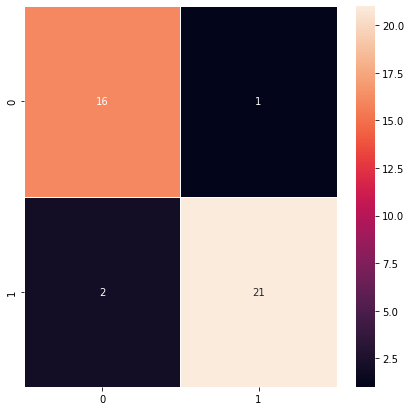

In [29]:
cf_matrix = confusion_matrix(y_test, y_hat)
sns.heatmap(cf_matrix, linewidths=1, annot=True)
plt.show()

### Podzadatak 4

In [30]:
model7 = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_hat = model7.predict(X_test)
print(f'Accuracy  = {accuracy_score(y_test, y_hat)}')
print(f'Recall    = {recall_score(y_test, y_hat)}')
print(f'Precision = {precision_score(y_test, y_hat)}')

Accuracy  = 0.925
Recall    = 0.9130434782608695
Precision = 0.9545454545454546
